## NN Adv Assignment

In [2]:
! pip install tensorflow

  Using cached https://files.pythonhosted.org/packages/55/d1/a3631a36859ee324e1767fa7554fdf7af17965571d8537b20b311b76bcfe/tensorflow-2.11.0-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/f7/8c/18288ac12dc0e1997c73f1b86dbd6f7fa3674ae5341769387e1f13b07c9e/tensorflow_intel-2.11.0-cp37-cp37m-win_amd64.whl


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### TensorFlow

import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings(action='ignore')

### Load Data

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [3]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [4]:
train['label'].nunique()

10

In [5]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,67,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,2,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,93,58,78,45,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,71,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,63,0,0,0,0,0,0,0


In [6]:
X = train.iloc[:, :-1].values
X = X.reshape(-1, 28, 28, 1)
y = train.iloc[:, -1].values

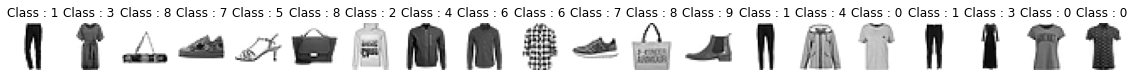

In [7]:
pltsize = 1
plt.figure(figsize=(20 * pltsize, pltsize))
for idx in range(0, 20):
    plt.subplot(1, 20, idx + 1)
    plt.axis('off')
    plt.imshow(X[idx].reshape(28, 28), cmap='gray_r')
    plt.title(f'Class : {y[idx]}')

In [8]:
X_test = test.values

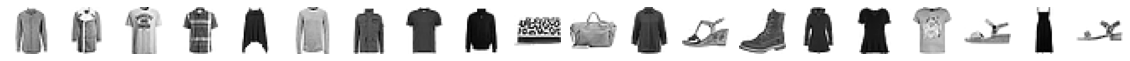

In [9]:
pltsize = 1
plt.figure(figsize=(20 * pltsize, pltsize))
for idx in range(0, 20):
    plt.subplot(1, 20, idx + 1)
    plt.axis('off')
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray_r')

### Train-Test Split

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 16, stratify = y, shuffle = True)

# 정규화
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# 파라미터 수정

In [11]:
BATCH_SIZE = 128
EPOCHS = 50

#### activation function 변경 - relu

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.5)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
result = model.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 22s 14ms/step - loss: 0.6429 - accuracy: 0.7784 - val_loss: 0.4690 - val_accuracy: 0.8336
Epoch 2/10
1488/1488 [==============================] - 19s 13ms/step - loss: 0.4455 - accuracy: 0.8423 - val_loss: 0.4107 - val_accuracy: 0.8555
Epoch 3/10
1488/1488 [==============================] - 19s 13ms/step - loss: 0.3983 - accuracy: 0.8563 - val_loss: 0.4100 - val_accuracy: 0.8530
Epoch 4/10
1488/1488 [==============================] - 22s 15ms/step - loss: 0.3695 - accuracy: 0.8671 - val_loss: 0.3480 - val_accuracy: 0.8782
Epoch 5/10
1488/1488 [==============================] - 25s 17ms/step - loss: 0.3465 - accuracy: 0.8744 - val_loss: 0.3650 - val_accuracy: 0.8702
Epoch 6/10
1488/1488 [==============================] - 22s 15ms/step - loss: 0.3304 - accuracy: 0.8796 - val_loss: 0.3406 - val_accuracy: 0.8784
Epoch 7/10
1488/1488 [==============================] - 19s 13ms/step - loss: 0.3127 - accuracy: 0.8843 - val_loss: 0.3366 -

epoch 늘려서 학습

In [15]:
result = model.fit(X_train, y_train, epochs=50, validation_data = (X_val, y_val))

Epoch 1/50
1488/1488 [==============================] - 20s 13ms/step - loss: 0.2666 - accuracy: 0.9015 - val_loss: 0.3450 - val_accuracy: 0.8738
Epoch 2/50
1488/1488 [==============================] - 20s 14ms/step - loss: 0.2566 - accuracy: 0.9050 - val_loss: 0.3005 - val_accuracy: 0.8896
Epoch 3/50
1488/1488 [==============================] - 20s 14ms/step - loss: 0.2482 - accuracy: 0.9082 - val_loss: 0.3004 - val_accuracy: 0.8882
Epoch 4/50
1488/1488 [==============================] - 23s 16ms/step - loss: 0.2403 - accuracy: 0.9108 - val_loss: 0.3084 - val_accuracy: 0.8893
Epoch 5/50
1488/1488 [==============================] - 20s 13ms/step - loss: 0.2317 - accuracy: 0.9142 - val_loss: 0.3151 - val_accuracy: 0.8851
Epoch 6/50
1488/1488 [==============================] - 24s 16ms/step - loss: 0.2244 - accuracy: 0.9168 - val_loss: 0.2872 - val_accuracy: 0.8976
Epoch 7/50
1488/1488 [==============================] - 26s 17ms/step - loss: 0.2155 - accuracy: 0.9204 - val_loss: 0.2873 -

#### activation function linear + relu 로 변경해서 학습

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='linear'),
    keras.layers.Dense(256, activation='linear'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.5)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
result = model.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 11s 7ms/step - loss: 0.5747 - accuracy: 0.7985 - val_loss: 0.4567 - val_accuracy: 0.8371
Epoch 2/10
1488/1488 [==============================] - 11s 7ms/step - loss: 0.4306 - accuracy: 0.8460 - val_loss: 0.4066 - val_accuracy: 0.8546
Epoch 3/10
1488/1488 [==============================] - 11s 7ms/step - loss: 0.3931 - accuracy: 0.8575 - val_loss: 0.4038 - val_accuracy: 0.8513
Epoch 4/10
1488/1488 [==============================] - 11s 7ms/step - loss: 0.3684 - accuracy: 0.8669 - val_loss: 0.4008 - val_accuracy: 0.8580
Epoch 5/10
1488/1488 [==============================] - 11s 7ms/step - loss: 0.3492 - accuracy: 0.8733 - val_loss: 0.3560 - val_accuracy: 0.8736
Epoch 6/10
1488/1488 [==============================] - 10s 7ms/step - loss: 0.3319 - accuracy: 0.8777 - val_loss: 0.3347 - val_accuracy: 0.8808
Epoch 7/10
1488/1488 [==============================] - 11s 7ms/step - loss: 0.3205 - accuracy: 0.8816 - val_loss: 0.3307 - val_ac

#### learning rate 변경

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='linear'),
    keras.layers.Dense(256, activation='linear'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
optimizer = keras.optimizers.SGD(lr=0.05, momentum=0.5)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
result = model.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 11s 7ms/step - loss: 0.5779 - accuracy: 0.7988 - val_loss: 0.4385 - val_accuracy: 0.8463
Epoch 2/10
1488/1488 [==============================] - 10s 7ms/step - loss: 0.4370 - accuracy: 0.8457 - val_loss: 0.4142 - val_accuracy: 0.8499
Epoch 3/10
1488/1488 [==============================] - 11s 7ms/step - loss: 0.3965 - accuracy: 0.8568 - val_loss: 0.3899 - val_accuracy: 0.8608
Epoch 4/10
1488/1488 [==============================] - 11s 7ms/step - loss: 0.3698 - accuracy: 0.8656 - val_loss: 0.3467 - val_accuracy: 0.8759
Epoch 5/10
1488/1488 [==============================] - 11s 7ms/step - loss: 0.3493 - accuracy: 0.8726 - val_loss: 0.3416 - val_accuracy: 0.8747
Epoch 6/10
1488/1488 [==============================] - 10s 7ms/step - loss: 0.3353 - accuracy: 0.8792 - val_loss: 0.3411 - val_accuracy: 0.8824
Epoch 7/10
1488/1488 [==============================] - 10s 7ms/step - loss: 0.3239 - accuracy: 0.8826 - val_loss: 0.3382 - val_ac

In [22]:
result = model.fit(X_train, y_train, epochs=50, validation_data = (X_val, y_val))

Epoch 1/50
1488/1488 [==============================] - 11s 7ms/step - loss: 0.2859 - accuracy: 0.8954 - val_loss: 0.3307 - val_accuracy: 0.8821
Epoch 2/50
1488/1488 [==============================] - 11s 7ms/step - loss: 0.2773 - accuracy: 0.8987 - val_loss: 0.3454 - val_accuracy: 0.8736
Epoch 3/50
1488/1488 [==============================] - 11s 8ms/step - loss: 0.2717 - accuracy: 0.8995 - val_loss: 0.3126 - val_accuracy: 0.8882
Epoch 4/50
1488/1488 [==============================] - 11s 7ms/step - loss: 0.2643 - accuracy: 0.9033 - val_loss: 0.3081 - val_accuracy: 0.8921
Epoch 5/50
1488/1488 [==============================] - 11s 7ms/step - loss: 0.2596 - accuracy: 0.9046 - val_loss: 0.3191 - val_accuracy: 0.8830
Epoch 6/50
1488/1488 [==============================] - 11s 7ms/step - loss: 0.2535 - accuracy: 0.9073 - val_loss: 0.3111 - val_accuracy: 0.8902
Epoch 7/50
1488/1488 [==============================] - 10s 7ms/step - loss: 0.2485 - accuracy: 0.9084 - val_loss: 0.3048 - val_ac

가장 accuracy가 높은 경우는 activation function으로 relu 로 하고 learning rate를 0.01로 한 모델이었다.